In [120]:
.libPaths("/home/senyaaa/BI-PRS/packages")
#.libPaths("/home/senyaaa/BI-PRS/packages") # change to ur folder
#.libPaths("/home/senyaaa/BI-PRS/packages")

library(dplyr) # download too
library(eurostat)
library(ggplot2)
library(gridExtra) # download too
library(cowplot)

In [88]:
surname <- "pogodin"
L <- nchar(surname)
K <- 4
M <- ((K + L) * 47) %% 11 + 1
print(M)

[1] 1


In [89]:
# get id for dataset
srch <- search_eurostat(pattern='Police-recorded offences by NUTS 3 regions')
srch

title,code,type,last.update.of.data,last.table.structure.change,data.start,data.end,values,hierarchy
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Police-recorded offences by NUTS 3 regions,crim_gen_reg,dataset,05.12.2023,05.12.2023,2008,2021,216947,4
Police-recorded offences by NUTS 3 regions,crim_gen_reg,dataset,05.12.2023,05.12.2023,2008,2021,216947,4


In [90]:
nuts3_cz <- c(
  "CZ010", "CZ020", "CZ031", "CZ032", "CZ041",
  "CZ042", "CZ051", "CZ052", "CZ053", "CZ063",
  "CZ064", "CZ071", "CZ072", "CZ080"
)

In [91]:
# Download data
data <- get_eurostat(id = "crim_gen_reg")

# choose only required data and remove unneccesary columns
data$TIME_PERIOD <- as.Date(data$TIME_PERIOD)
czech_data <- data %>%
  filter(geo %in% nuts3_cz, TIME_PERIOD == "2021-01-01")
czech_data$freq <- NULL
czech_data <- czech_data[czech_data$unit != "P_HTHAB", ]
czech_data$unit <- NULL
czech_data$TIME_PERIOD <- NULL

head(czech_data)
tail(czech_data)

Dataset query already saved in cache_list.json...

Reading cache file /tmp/RtmpDjRp6x/eurostat/514bb2dfc5a7e76e29b916f8a85d1355.rds

Table  crim_gen_reg  read from cache file:  /tmp/RtmpDjRp6x/eurostat/514bb2dfc5a7e76e29b916f8a85d1355.rds



iccs,geo,values
<chr>,<chr>,<dbl>
ICCS0101,CZ010,7
ICCS0101,CZ020,1
ICCS0101,CZ031,7
ICCS0101,CZ032,2
ICCS0101,CZ041,3
ICCS0101,CZ042,5


iccs,geo,values
<chr>,<chr>,<dbl>
ICCS050211,CZ053,59
ICCS050211,CZ063,51
ICCS050211,CZ064,234
ICCS050211,CZ071,86
ICCS050211,CZ072,57
ICCS050211,CZ080,226


In [92]:
iccs_mapping <- c(
  "ICCS0101" = "Intentional homicide",
  "ICCS02011" = "Assault",
  "ICCS0401" = "Robbery",
  "ICCS0501" = "Burglary",
  "ICCS05012" = "Burglary of private residential premises",
  "ICCS0502" = "Theft",
  "ICCS050211" = "Theft of a motorized land vehicle"
)
nuts3_mapping <- c(
  "CZ010" = "Hlavní město Praha",
  "CZ020" = "Středočeský kraj",
  "CZ031" = "Jihočeský kraj",
  "CZ032" = "Plzeňský kraj",
  "CZ041" = "Karlovarský kraj",
  "CZ042" = "Ústecký kraj",
  "CZ051" = "Liberecký kraj",
  "CZ052" = "Královéhradecký kraj",
  "CZ053" = "Pardubický kraj",
  "CZ063" = "Kraj Vysočina",
  "CZ064" = "Jihomoravský kraj",
  "CZ071" = "Olomoucký kraj",
  "CZ072" = "Zlínský kraj",
  "CZ080" = "Moravskoslezský kraj"
)
# rename for better vizualization
czech_data <- czech_data %>%
  mutate(iccs = iccs_mapping[iccs])
czech_data$geo <- nuts3_mapping[czech_data$geo]

## Základní popis
Zkoumaná data jsou tabulka, která obsahuje tři sloupce: "iccs" (typ trestného činu), "geo" (NUTS 3 region) a "values" (počet trestných činů). Data zahrnují různé typy trestných činů v jednotlivých regionech České republiky.


In [93]:
czech_data

iccs,geo,values
<chr>,<chr>,<dbl>
Intentional homicide,Hlavní město Praha,7
Intentional homicide,Středočeský kraj,1
Intentional homicide,Jihočeský kraj,7
Intentional homicide,Plzeňský kraj,2
Intentional homicide,Karlovarský kraj,3
Intentional homicide,Ústecký kraj,5
Intentional homicide,Liberecký kraj,3
Intentional homicide,Královéhradecký kraj,1
Intentional homicide,Pardubický kraj,0


In [94]:
# split into separate nuts3 tables
region_tables <- split(czech_data, czech_data$geo)

In [101]:
# predefine table
stats_table <- data.frame(
  Region = character(), 
  Min = numeric(),  
  Min_Crime = character(),
  Max = numeric(),  
  Max_Crime = character(),    
  Mean = numeric(), 
  Median = numeric(), 
  stringsAsFactors = FALSE
)

# calculate basic statistic for each nuts3 region
for (region in names(region_tables)) {
  region_data <- region_tables[[region]]

  min_crime <- region_data[which.min(region_data$values), "iccs"]
  max_crime <- region_data[which.max(region_data$values), "iccs"]  

  min_crime <- as.character(min_crime)
  max_crime <- as.character(max_crime)  
    
  summary_stats <- region_data %>%
    summarise(
      Min = min(values),
      Max = max(values),  
      Mean = mean(values),
      Median = median(values),
    )
  
  summary_stats$Region <- region
  summary_stats$Min_Crime <- min_crime
  summary_stats$Max_Crime <- max_crime
  
  # add row
  stats_table <- bind_rows(stats_table, summary_stats)
}

print(stats_table)

                 Region Min            Min_Crime  Max Max_Crime      Mean
1    Hlavní město Praha   7 Intentional homicide 9937  Burglary 2863.0000
2        Jihočeský kraj   7 Intentional homicide 1044     Theft  374.0000
3     Jihomoravský kraj   6 Intentional homicide 3296  Burglary 1043.4286
4      Karlovarský kraj   3 Intentional homicide  633     Theft  229.8571
5         Kraj Vysočina   3 Intentional homicide  508  Burglary  208.5714
6  Královéhradecký kraj   1 Intentional homicide  677     Theft  241.7143
7        Liberecký kraj   3 Intentional homicide  938  Burglary  352.2857
8  Moravskoslezský kraj   4 Intentional homicide 3686  Burglary 1252.0000
9        Olomoucký kraj   2 Intentional homicide 1188     Theft  388.0000
10      Pardubický kraj   0 Intentional homicide  644     Theft  218.4286
11        Plzeňský kraj   2 Intentional homicide 1775  Burglary  549.8571
12     Středočeský kraj   1 Intentional homicide 4006  Burglary 1245.8571
13         Ústecký kraj   5 Intentiona

### Zajímavosti

 * **Praha versus regiony**: Hlavní město Praha vykazuje výrazně vyšší počet trestných činů než většina ostatních regionů. To může být způsobeno vysokou hustotou obyvatelstva a vyšší mírou urbanizace, což vede ke zvýšené kriminalitě v oblastech s větší populací a ekonomickou aktivitou.
 * Jihomoravský kraj a Moravskoslezský mají také vysoký průměrný počet trestných činů (Mean = 1043, Mean = 1252), což může být důsledkem jeho rozsáhlého průmyslového a obchodního sektoru.
 * Naopak Pardubický kraj má nejnižší průměrný počet trestných činů (Mean = 218), což může naznačovat relativně nižší úroveň kriminality v tomto regionu. Jeden z možných důvodu je např. vyšší míra sociální stability a silnější komunitní vazby
 * Minimální hodnoty:
     1. Intentional homicide: nízký počet úmyslných vražd, může to být výsledek několika faktorů jako jsou silné sociální normy proti násilí a vraždám,tyto trestné činy méně tolerovány což je logický. Regiony může mít účinné bezpečnostní opatření, jako je vysoká přítomnost policie, moderní technologie sledování a prevence kriminality
 * Maximální hodnoty:
     1. Theft, burglary: jednoduchost spáchání vloupání a krádeží a riziko, že pachatelé nebudou chyceni, může být jedním z faktorů, které přispívají k vysokým počtům těchto trestných činů. Možnost rychle získat cenný majetek nebo peníze může také motivaci

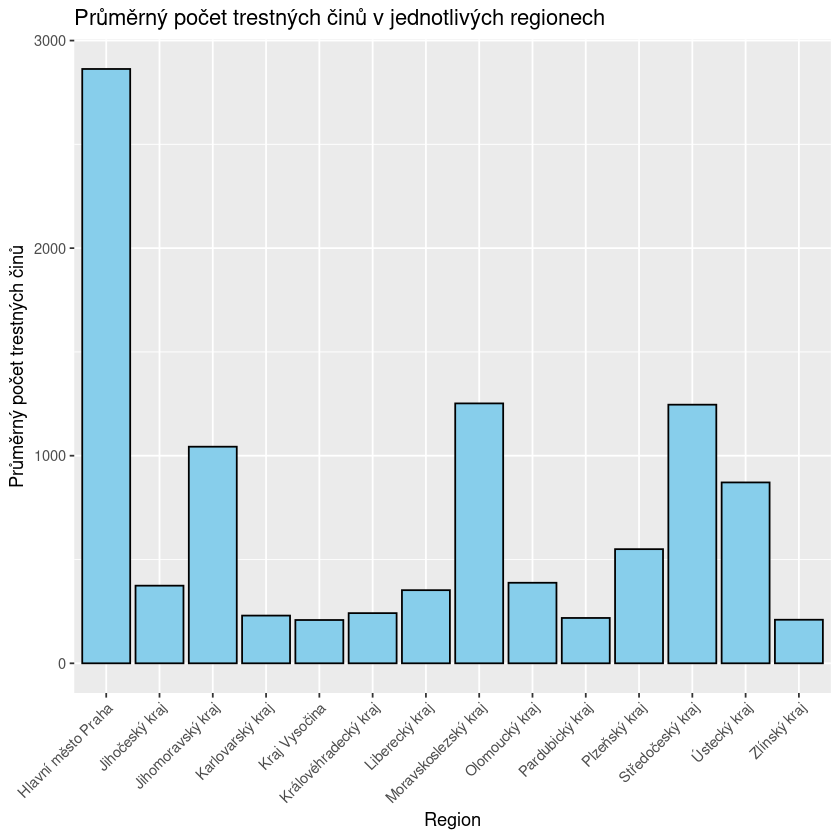

In [128]:
ggplot(czech_data, aes(x = geo, y = values)) +
  geom_bar(stat = "summary", fun = "mean", fill = "skyblue", color = "black") +
  labs(title = "Průměrný počet trestných činů v jednotlivých regionech", 
       x = "Region", y = "Průměrný počet trestných činů") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

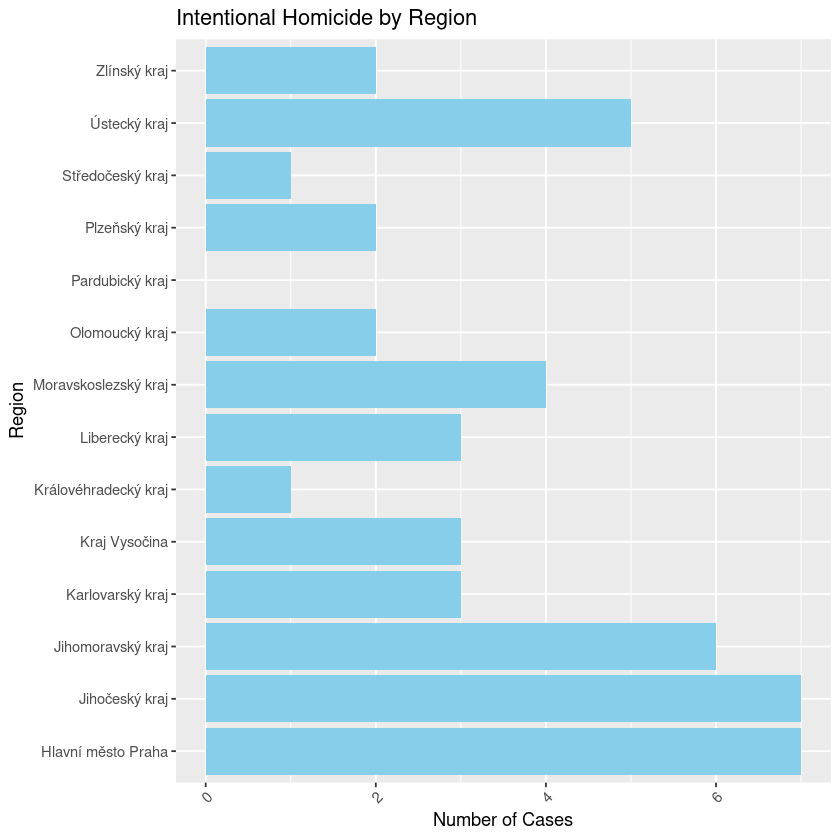

In [136]:
homicide_plot <- ggplot(czech_data[czech_data$iccs == "Intentional homicide", ], aes(x = geo, y = values)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Intentional Homicide by Region", x = "Region", y = "Number of Cases") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()
homicide_plot

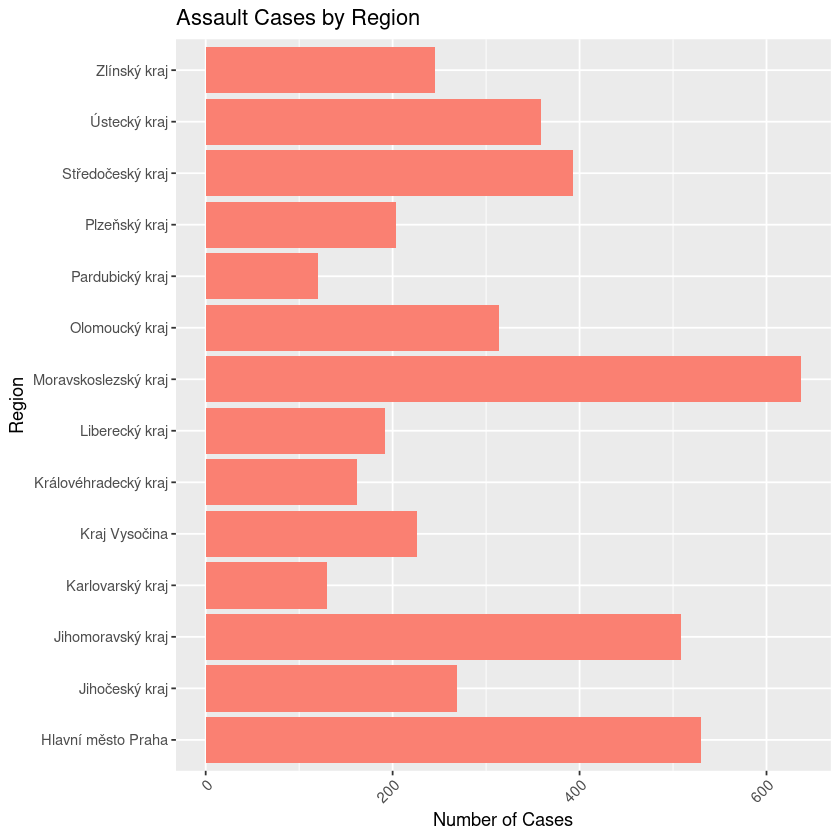

In [138]:
assault_plot <- ggplot(czech_data[czech_data$iccs == "Assault", ], aes(x = geo, y = values)) +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Assault Cases by Region", x = "Region", y = "Number of Cases") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()
assault_plot

In [143]:
# todo pie chart